In [1]:
import pandas as pd
import numpy as np
import os
from pandas import Series, DataFrame, Panel
from datetime import datetime

In [2]:
import plotly.plotly as py
import cufflinks as cf


In [3]:

from matplotlib import pyplot


In [4]:
filename = './data/bangladesh_201901_1_tweets_csv_hashed.csv'

In [5]:
bld = pd.read_csv(filename, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

In [6]:
print(len(bld))

26214


In [7]:
bld.columns


Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_text', 'tweet_time',
       'tweet_client_name', 'in_reply_to_tweetid', 'in_reply_to_userid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_userid',
       'retweet_tweetid', 'latitude', 'longitude', 'quote_count',
       'reply_count', 'like_count', 'retweet_count', 'hashtags', 'urls',
       'user_mentions', 'poll_choices'],
      dtype='object')

In [ ]:
#russia['tweet_time']

In [8]:
bld['tweet_record_time'] = pd.to_datetime(bld['tweet_time'], format ='%Y-%m-%d %H:%M')

In [ ]:
#russia['tweet_record_time']

In [9]:
time = []

In [10]:
for i in bld['tweet_record_time']:
    time.append(i.time())
    #print(i.time())

In [11]:
bld['time'] = time

In [12]:
hour =[]

In [13]:
for i in bld['time']:
    hour.append(i.hour)
    #print(i.time())

In [14]:
bld['hour'] = hour

In [15]:
bld.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,tweet_record_time,time,hour
0,986160604619649024,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,"Dhaka, Bangladesh",https://t.co/wtfVbjri8C is a Bangladesh based ...,https://t.co/NqkVpBrBsg,156,8,2017-11-14,...,0.0,0.0,0.0,[],[https://sarabangla.net/%E0%A6%B9%E0%A6%95%E0%...,[],NaN,2018-04-17 08:33:00,08:33:00,8
1,1040905558256046080,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,"Dhaka, Bangladesh",https://t.co/wtfVbjri8C is a Bangladesh based ...,https://t.co/NqkVpBrBsg,156,8,2017-11-14,...,0.0,0.0,0.0,[],[https://sarabangla.net/%e0%a6%ac%e0%a6%bf%e0%...,[],NaN,2018-09-15 10:09:00,10:09:00,10
2,1040624936866340864,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,"Dhaka, Bangladesh",https://t.co/wtfVbjri8C is a Bangladesh based ...,https://t.co/NqkVpBrBsg,156,8,2017-11-14,...,0.0,0.0,0.0,[],[https://sarabangla.net/%e0%a6%a1%e0%a6%be%e0%...,[],NaN,2018-09-14 15:34:00,15:34:00,15
3,1049662660466417664,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,"Dhaka, Bangladesh",https://t.co/wtfVbjri8C is a Bangladesh based ...,https://t.co/NqkVpBrBsg,156,8,2017-11-14,...,0.0,0.0,0.0,[],[https://sarabangla.net/%e0%a6%ac%e0%a7%8d%e0%...,[],NaN,2018-10-09 14:07:00,14:07:00,14
4,987668205094125568,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,UOYzWkr60fJQXg134s861VR6yVN8ECzm9Onrnvu5s=,"Dhaka, Bangladesh",https://t.co/wtfVbjri8C is a Bangladesh based ...,https://t.co/NqkVpBrBsg,156,8,2017-11-14,...,0.0,0.0,0.0,[],[https://sarabangla.net/%E0%A6%B0%E2%80%8C%E0%...,[],NaN,2018-04-21 12:23:00,12:23:00,12


In [32]:
#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

#russia.iplot(x='time',kind='scatter') 

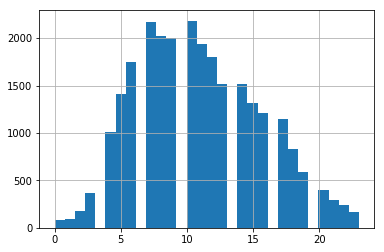

In [16]:
bld['hour'].hist(bins = 30)

In [31]:
#russia['hour'].plot()
#pyplot.show()

In [28]:
import matplotlib
import matplotlib.pyplot as plt

In [17]:
pd.crosstab(index=bld['user_reported_location'],   columns="count").sort_values(by=['count'])

col_0,count
user_reported_location,
"Sylhet, Bangladesh",14
"Narayanganj, Bangladesh",122
Bangladesh,686
Dhaka,2134
"Dhaka, Bangladesh",21343
